<a href="https://colab.research.google.com/github/Beatriz-Yun/AIFFEL_LMS/blob/main/Exploration/%5BE_03%5D%EA%B3%A0%EC%96%91%EC%9D%B4%EC%88%98%EC%97%BC_%EC%8A%A4%ED%8B%B0%EC%BB%A4_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d /content/shape_predictor_68_face_landmarks.dat.bz2

--2021-07-20 06:23:28--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  21.0MB/s    in 2.9s    

2021-07-20 06:23:31 (21.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



## image2 (정면사진)

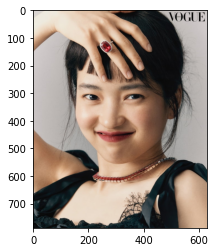

In [270]:
# opencv로 이미지 읽어오기
my_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/image2.jpg'
img_bgr = cv2.imread(my_image_path)

# 이미지 복사본 생성 (출력용)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # rgb로 변환 후 plt.imshow실행해야 함.
plt.imshow(img_rgb)
plt.show()

rectangles[[(139, 213) (472, 546)]]


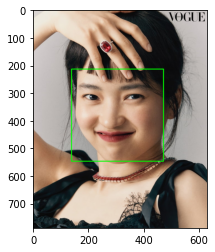

In [271]:
import dlib
detector_hog = dlib.get_frontal_face_detector()       # detector 선언
dlib_rects = detector_hog(img_rgb, 2)                 # (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)    # img_show위에 얼굴영역을 사각형으로 그리기

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [272]:
# landmark모델을 불러옴
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    points = landmark_predictor(img_rgb, dlib_rect)
    # dlib.full_object_detection의 메소드를 통해 좌표를 받아 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(155, 304), (155, 343), (157, 381), (164, 418), (178, 455), (202, 487), (229, 517), (255, 544), (289, 555), (330, 553), (374, 536), (415, 512), (451, 480), (473, 440), (482, 395), (487, 350), (488, 306), (161, 281), (176, 266), (201, 265), (226, 271), (251, 282), (306, 284), (337, 271), (370, 266), (405, 268), (435, 286), (280, 316), (279, 348), (277, 380), (275, 412), (248, 415), (263, 424), (281, 431), (300, 424), (319, 417), (187, 313), (204, 307), (224, 308), (243, 323), (222, 325), (201, 322), (333, 322), (353, 309), (374, 307), (396, 314), (376, 322), (354, 323), (224, 439), (244, 439), (265, 439), (284, 444), (304, 440), (333, 441), (367, 442), (335, 467), (305, 477), (284, 479), (264, 476), (244, 462), (233, 443), (265, 450), (285, 454), (305, 452), (358, 445), (305, 460), (284, 462), (264, 458)]


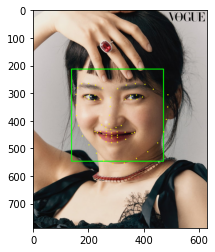

In [273]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_show에 landmark 68개를 노란색점으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [274]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]

    y = landmark[33][1]
    y += landmark[2][1]
    y += landmark[36][1]
    y += landmark[59][1]
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (281,396)
(w,h) : (334,334)


(x,y) : (114,229)


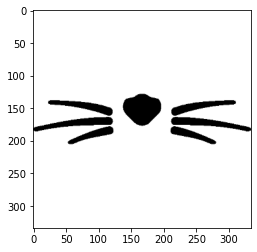

In [275]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # 사진 위 스티커의 left-top 좌표

In [276]:
print(img_sticker.shape)

# y좌표가 음수일 때, -y만큼 이미지를 잘라준 후 y 경계값은 0으로 설정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]   # 행 제거
    refined_y = 0
if refined_x < 0:
    img_sticker = np.delete(img_sticker, list(range(0, -refined_x+1)), axis=1)    # 열 제거
    refined_x = 0

print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(334, 334, 3)
(334, 334, 3)
(x,y) : (114,229)


스티커부분이 흰색은 그대로, 검은색은 투명으로 나오는 문제 해결

np.where 이해하기

[공식문서-numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

[numpy의 where 함수 사용법](https://pinkwink.kr/1236)

(334, 334, 3)


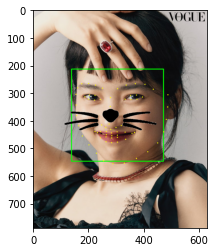

In [277]:
# img_show는 원본 사진의 복사본이다.
# sticker_area는 사진의 일부이다. 스티커를 추가할 즉, 얼굴이 있는 범위에 해당한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)


img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255 ,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

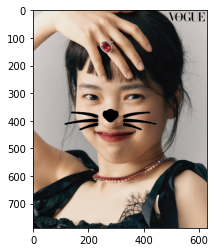

In [278]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## image3

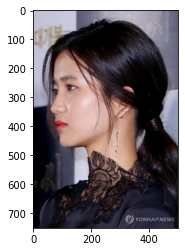

In [279]:
# opencv로 이미지 읽어오기
my_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/image3.jpg'
img_bgr = cv2.imread(my_image_path)

# 이미지 복사본 생성 (출력용)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # rgb로 변환 후 plt.imshow실행해야 함.
plt.imshow(img_rgb)
plt.show()

rectangles[[(-33, 199) (224, 430)]]


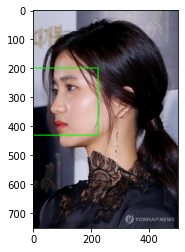

In [280]:
import dlib
detector_hog = dlib.get_frontal_face_detector()       # detector 선언
dlib_rects = detector_hog(img_rgb, 2)                 # (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표
left = 0

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    left = l

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)    # img_show위에 얼굴영역을 사각형으로 그리기

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [281]:
# landmark모델을 불러옴
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    points = landmark_predictor(img_rgb, dlib_rect)
    
    # dlib.full_object_detection의 메소드를 통해 좌표를 받아 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(47, 289), (39, 310), (39, 333), (45, 358), (52, 382), (59, 409), (69, 436), (82, 459), (107, 468), (139, 469), (174, 458), (206, 440), (232, 416), (251, 388), (260, 354), (259, 321), (255, 287), (41, 242), (43, 229), (53, 224), (66, 226), (76, 236), (92, 234), (115, 224), (141, 222), (166, 230), (187, 243), (86, 272), (81, 294), (73, 315), (67, 337), (63, 348), (69, 355), (78, 359), (90, 356), (103, 352), (51, 273), (56, 265), (69, 266), (81, 276), (68, 278), (56, 278), (121, 275), (131, 264), (146, 264), (160, 273), (148, 277), (132, 277), (72, 393), (67, 382), (73, 377), (79, 380), (87, 378), (106, 386), (125, 398), (108, 409), (94, 413), (84, 413), (77, 410), (71, 402), (77, 392), (75, 390), (81, 391), (89, 391), (117, 397), (91, 397), (82, 397), (77, 394)]


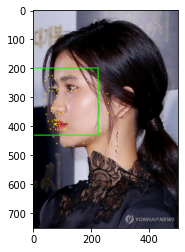

In [282]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_show에 landmark 68개를 노란색점으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [283]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]

    y = landmark[33][1]
    y += landmark[2][1]
    y += landmark[36][1]
    y += landmark[59][1]
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (78,341)
(w,h) : (258,258)


(x,y) : (-51,212)


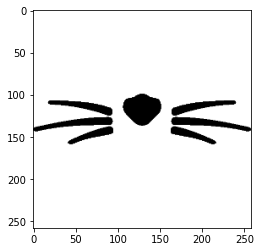

In [285]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # 사진 위 스티커의 left-top 좌표

In [286]:
print(img_sticker.shape)

# y좌표가 음수일 때, -y만큼 이미지를 잘라준 후 y 경계값은 0으로 설정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]   # 행 제거
    refined_y = 0
if refined_x < 0:
    img_sticker = np.delete(img_sticker, list(range(0, -refined_x+1)), axis=1)    # 열 제거
    refined_x = 0

print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(258, 258, 3)
(258, 206, 3)
(x,y) : (0,212)


(258, 206, 3)


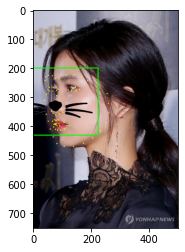

In [287]:
# img_show는 원본 사진의 복사본이다.
# sticker_area는 사진의 일부이다. 스티커를 추가할 즉, 얼굴이 있는 범위에 해당한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)


img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255 ,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

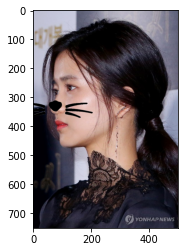

In [288]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## image5

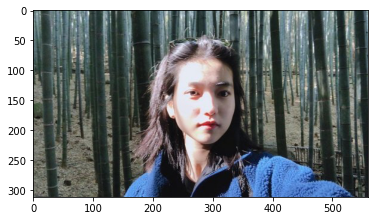

In [289]:
# opencv로 이미지 읽어오기
my_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/image5.jpg'
img_bgr = cv2.imread(my_image_path)

# 이미지 복사본 생성 (출력용)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # rgb로 변환 후 plt.imshow실행해야 함.
plt.imshow(img_rgb)
plt.show()

rectangles[[(231, 95) (342, 207)]]


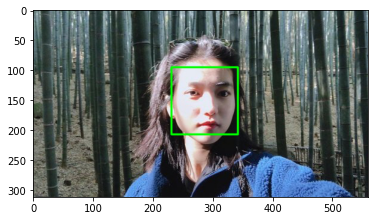

In [290]:
import dlib
detector_hog = dlib.get_frontal_face_detector()       # detector 선언
dlib_rects = detector_hog(img_rgb, 2)                 # (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)    # img_show위에 얼굴영역을 사각형으로 그리기

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [291]:
# landmark모델을 불러옴
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    points = landmark_predictor(img_rgb, dlib_rect)
    # dlib.full_object_detection의 메소드를 통해 좌표를 받아 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(232, 139), (232, 153), (234, 168), (238, 182), (246, 194), (256, 205), (268, 214), (281, 222), (292, 224), (303, 222), (313, 213), (322, 203), (329, 192), (333, 178), (337, 165), (338, 152), (337, 140), (249, 125), (258, 121), (268, 120), (278, 122), (288, 126), (304, 127), (312, 123), (321, 121), (329, 122), (334, 127), (297, 139), (298, 148), (299, 157), (300, 166), (288, 174), (293, 176), (298, 177), (302, 176), (306, 174), (259, 138), (266, 135), (273, 136), (279, 141), (272, 142), (265, 142), (308, 142), (314, 136), (321, 136), (327, 140), (322, 143), (315, 143), (276, 193), (285, 188), (293, 185), (297, 186), (301, 185), (308, 188), (313, 193), (307, 197), (301, 199), (296, 200), (292, 199), (285, 197), (279, 192), (293, 191), (296, 192), (301, 191), (309, 193), (301, 191), (296, 192), (292, 192)]


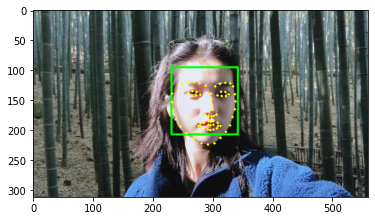

In [292]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_show에 landmark 68개를 노란색점으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [217]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30]) # nose center index : 30
    print(landmark[2])
    print(landmark[36])
    print(landmark[48])
    x = landmark[30][0]    # x좌표(전체이미지 기준)
    y = landmark[30][1]    # y좌표
    #x += landmark[2][0]
    y += landmark[2][1]
    #x += landmark[36][0]
    y += landmark[36][1]
    #x += landmark[48][0]
    y += landmark[48][1]
    #x //= 4
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(300, 166)
(234, 168)
(259, 138)
(276, 193)
(x,y) : (300,166)
(w,h) : (112,112)


In [293]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]

    y = landmark[33][1]
    y += landmark[2][1]
    y += landmark[36][1]
    y += landmark[59][1]
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (298,170)
(w,h) : (112,112)


(x,y) : (242,114)


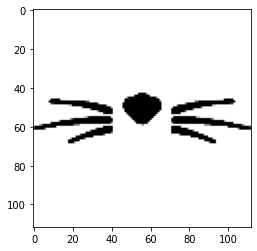

In [294]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # 사진 위 스티커의 left-top 좌표

In [295]:
print(img_sticker.shape)

# y좌표가 음수일 때, -y만큼 이미지를 잘라준 후 y 경계값은 0으로 설정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]   # 행 제거
    refined_y = 0
if refined_x < 0:
    np.delete(img_sticker, list(range(0, -refined_x+1)), axis=1)    # 열 제거
    refined_x = 0

print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(112, 112, 3)
(112, 112, 3)
(x,y) : (242,114)


(112, 112, 3)


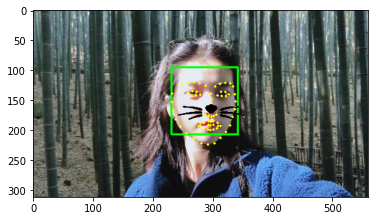

In [296]:
# img_show는 원본 사진의 복사본이다.
# sticker_area는 사진의 일부이다. 스티커를 추가할 즉, 얼굴이 있는 범위에 해당한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)


img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255 ,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

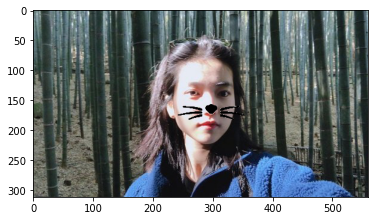

In [297]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## image6

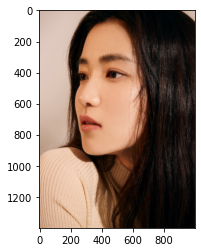

In [304]:
# opencv로 이미지 읽어오기
my_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/image6.jpg'
img_bgr = cv2.imread(my_image_path)

# 이미지 복사본 생성 (출력용)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # rgb로 변환 후 plt.imshow실행해야 함.
plt.imshow(img_rgb)
plt.show()

rectangles[[(114, 242) (689, 817)]]


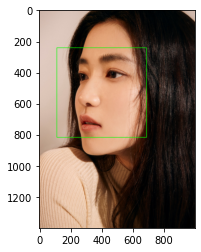

In [305]:
import dlib
detector_hog = dlib.get_frontal_face_detector()       # detector 선언
dlib_rects = detector_hog(img_rgb, 2)                 # (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)    # img_show위에 얼굴영역을 사각형으로 그리기

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [306]:
# landmark모델을 불러옴
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    points = landmark_predictor(img_rgb, dlib_rect)
    # dlib.full_object_detection의 메소드를 통해 좌표를 받아 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(256, 476), (237, 531), (232, 594), (241, 656), (253, 722), (264, 792), (273, 863), (298, 916), (347, 938), (418, 934), (500, 911), (572, 871), (632, 825), (677, 758), (702, 677), (714, 587), (717, 503), (244, 366), (251, 348), (266, 339), (285, 342), (303, 353), (394, 336), (436, 313), (489, 306), (542, 319), (587, 352), (339, 425), (322, 473), (302, 519), (281, 565), (280, 616), (292, 621), (309, 624), (332, 624), (358, 621), (260, 445), (268, 418), (293, 416), (317, 440), (294, 449), (269, 454), (430, 431), (453, 398), (491, 398), (531, 419), (495, 435), (457, 437), (280, 731), (269, 699), (281, 679), (297, 686), (313, 682), (356, 704), (412, 743), (362, 776), (324, 785), (307, 786), (290, 781), (278, 763), (289, 727), (289, 717), (302, 717), (318, 718), (391, 740), (319, 739), (304, 737), (290, 735)]


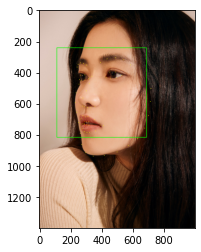

In [307]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_show에 landmark 68개를 노란색점으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [309]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]

    y = landmark[33][1]
    y += landmark[2][1]
    y += landmark[36][1]
    y += landmark[59][1]
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (309,606)
(w,h) : (576,576)


(x,y) : (21,318)


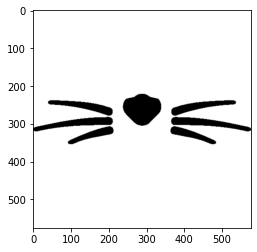

In [310]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # 사진 위 스티커의 left-top 좌표

In [311]:
print(img_sticker.shape)

# y좌표가 음수일 때, -y만큼 이미지를 잘라준 후 y 경계값은 0으로 설정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]   # 행 제거
    refined_y = 0
if refined_x < 0:
    np.delete(img_sticker, list(range(0, -refined_x+1)), axis=1)    # 열 제거
    refined_x = 0

print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(576, 576, 3)
(576, 576, 3)
(x,y) : (21,318)


(576, 576, 3)


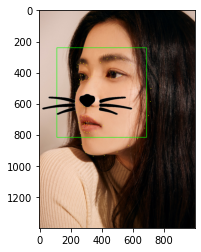

In [312]:
# img_show는 원본 사진의 복사본이다.
# sticker_area는 사진의 일부이다. 스티커를 추가할 즉, 얼굴이 있는 범위에 해당한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)


img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255 ,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

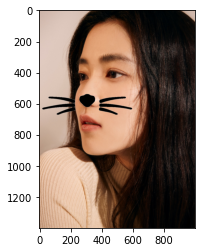

In [313]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## image7

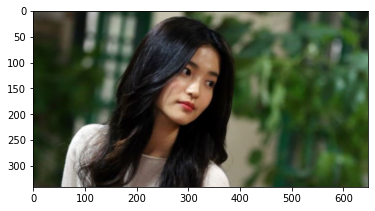

In [315]:
# opencv로 이미지 읽어오기
my_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/image7.jpg'
img_bgr = cv2.imread(my_image_path)

# 이미지 복사본 생성 (출력용)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # rgb로 변환 후 plt.imshow실행해야 함.
plt.imshow(img_rgb)
plt.show()

rectangles[[(233, 85) (366, 219)]]


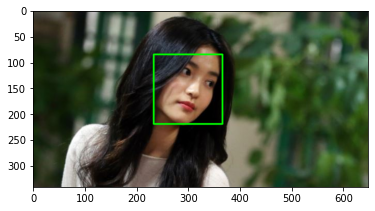

In [316]:
import dlib
detector_hog = dlib.get_frontal_face_detector()       # detector 선언
dlib_rects = detector_hog(img_rgb, 2)                 # (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)    # img_show위에 얼굴영역을 사각형으로 그리기

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [317]:
# landmark모델을 불러옴
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    points = landmark_predictor(img_rgb, dlib_rect)
    # dlib.full_object_detection의 메소드를 통해 좌표를 받아 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(241, 108), (236, 125), (234, 144), (233, 162), (238, 178), (245, 192), (256, 203), (269, 213), (282, 219), (295, 220), (307, 215), (316, 208), (326, 199), (335, 189), (343, 178), (348, 166), (351, 153), (272, 98), (285, 94), (298, 96), (310, 100), (320, 109), (338, 118), (346, 118), (354, 121), (359, 126), (359, 134), (324, 130), (322, 140), (320, 149), (318, 159), (299, 162), (304, 166), (310, 170), (315, 170), (320, 170), (280, 118), (290, 117), (297, 119), (302, 125), (295, 124), (288, 122), (333, 138), (342, 137), (348, 140), (351, 145), (346, 145), (339, 142), (278, 177), (291, 175), (302, 176), (305, 179), (310, 180), (313, 186), (313, 194), (307, 195), (302, 195), (298, 193), (293, 191), (285, 185), (281, 178), (299, 182), (303, 185), (307, 186), (310, 192), (306, 187), (301, 185), (297, 183)]


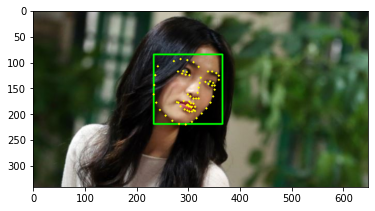

In [318]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_show에 landmark 68개를 노란색점으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [319]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]

    y = landmark[33][1]
    y += landmark[2][1]
    y += landmark[36][1]
    y += landmark[59][1]
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (310,154)
(w,h) : (134,134)


(x,y) : (243,87)


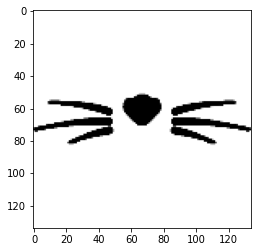

In [320]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # 사진 위 스티커의 left-top 좌표

In [321]:
print(img_sticker.shape)

# y좌표가 음수일 때, -y만큼 이미지를 잘라준 후 y 경계값은 0으로 설정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]   # 행 제거
    refined_y = 0
if refined_x < 0:
    np.delete(img_sticker, list(range(0, -refined_x+1)), axis=1)    # 열 제거
    refined_x = 0

print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(134, 134, 3)
(134, 134, 3)
(x,y) : (243,87)


(134, 134, 3)


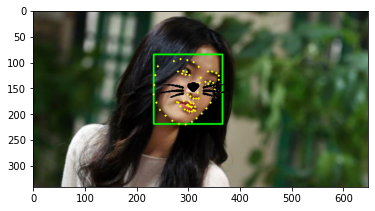

In [322]:
# img_show는 원본 사진의 복사본이다.
# sticker_area는 사진의 일부이다. 스티커를 추가할 즉, 얼굴이 있는 범위에 해당한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)


img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255 ,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

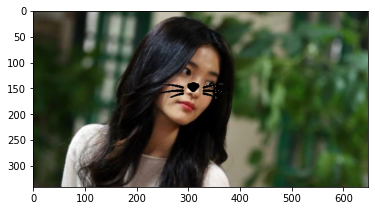

In [323]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()